# Latar Belakang
Perusahaan Taxi ingin mengetahui bagaimana keuntungan yang didapat di setiap aspek yang ada. Namun belum ditentukan apakah aspek yang perlu diperbaiki atau dibenarkan

# Pernyataan Masalah
Perusahaan ingin mengetahui aspek apa saja yang akan diperlukan, diganti sehingga mendapatkan keuntungan.

# Data
Data berasal dari NYC TLC Trip Record tahun 2015

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math as m

In [3]:
df = pd.read_csv('NYC TLC Trip Record.csv')

C:\Users\haeka\AppData\Local\Temp\ipykernel_17376\1402211860.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NYC TLC Trip Record.csv')


# **Data feature**
+ VendorID : Kode indikasi LPEP yang telah di sediakan
- Nilai Unik
- 1 untuk Creative Mobile Technologies, LCC
- 2 untuk VeriFone Inc.
+ lpep_pickup_datetime untuk Hari dan jam meteran mobil di aktifkan
- lpep_dropoff_datetime untuk Hari dan jam meteran mobil di matikan
+ Passenger_count adalah jumlah penumpang di kendaraan. Data ini dimasukkan oleh driver
+ Trip_distance adalah seberapa jauh jarak trip yang diberitahukan oleh taximeter
- PULocationID adalah Zona TLC Taxi disaat taximeter dihitung
+ DOLocationID adalah Zona TLC Taxi disaat taximeter diberhentikan
- RateCodeID adalah Kode tarif terakhir yang berlaku di akhir perjalanan
+ Nilai Unik
+ 1 untuk Standard rate
+ 2 untuk JFK
+ 3 untuk Newark
+ 4 untuk Nassau or westchester
+ 5 untuk Negotiated fare
+ 6 untuk Group ride
- Store_and_fwd_flag Catatan Perjalanan yang disimpan di kendaraan sebelum di kirim ke vendor, karena kendaraan tidak memiliki koneksi ke server
+ Nilai Unik
+ Y untuk store and foward trip
+ N untuk bukan store and foward trip
- Payment_type is kode penumpang untuk cara membayarnya
+ Nilai Unik
+ 1 is credit card
+ 2 is Cash
+ 3 is No charge
+ 4 is Dispute
+ 5 is Unknown
+ 6 is Voided trip
- Fare amount is The Tarif time-and-distance yang dihitung dengan meter, termasuk biaya tambahan lainnya. Biaya ini hanya mencakup jam sibuk dan overnight sebesar 0.5 atau 1 dollar
+ MTA_tax is $0.50 Pajak MTA yang aktif otomatis berdasarkan tarif per meter yang dipakai
- Improvement_surcharge is $0.30 biaya yang dikenakan untuk penjemputan di tempat bandara. Biaya meulai dikenakan tahun 2015.
+ Tip_amount is Column data yang akan terisi untuk kartu kredit. Tip tunai tidak termasuk
- Toll_amount is Jumlah total tol yang dibayarkan
+ Total_amount is Jumlah total pembayarnan oleh penumpang, tidak termasuk tip
- Trip_type is Kode yang menunjukkan apakah merupakan perjalan singkat atau pengiriman yang ditetapkan berdasarkan tarif standar, tapi bisa diubah oleh pengemudi.
+ Nilai Unik
+ Street-hall
+ Dispatch


# **Cleaning Data**

In [4]:
for col in df.columns:
    print(f'columns : {col} ({df[col].nunique()})')
    print(f'list    : {df[col].unique()[:10].tolist()}')
    print()

columns : VendorID (2)
list    : [2, 1]

columns : lpep_pickup_datetime (66575)
list    : ['2023-01-01 00:26:10', '2023-01-01 00:51:03', '2023-01-01 00:35:12', '2023-01-01 00:13:14', '2023-01-01 00:33:04', '2023-01-01 00:53:31', '2023-01-01 00:09:14', '2023-01-01 00:11:58', '2023-01-01 00:41:29', '2023-01-01 00:50:32']

columns : lpep_dropoff_datetime (66519)
list    : ['2023-01-01 00:37:11', '2023-01-01 00:57:49', '2023-01-01 00:41:32', '2023-01-01 00:19:03', '2023-01-01 00:39:02', '2023-01-01 01:11:04', '2023-01-01 00:26:39', '2023-01-01 00:24:55', '2023-01-01 00:46:26', '2023-01-01 01:13:42']

columns : store_and_fwd_flag (2)
list    : ['N', 'Y', nan]

columns : RatecodeID (6)
list    : [1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]

columns : PULocationID (226)
list    : [166, 24, 223, 41, 181, 255, 75, 66, 195, 83]

columns : DOLocationID (249)
list    : [143, 43, 179, 238, 74, 262, 45, 75, 166, 140]

columns : passenger_count (10)
list    : [1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0

<Axes: >

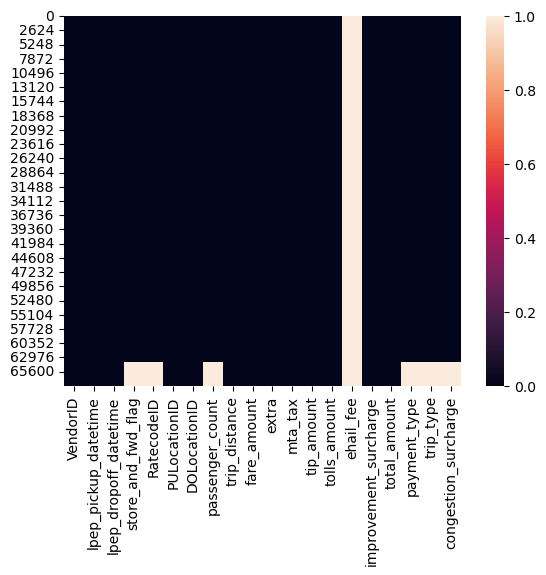

In [5]:
sns.heatmap(df.isna())

Column ehail_fee memiliki nilai kosong semua, delete columns saja

In [6]:
df.drop('ehail_fee', axis=1, inplace=True)

Data nan yang lain

In [7]:
print(df.isna().sum())
print(len(df))

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64
68211


Data Trip_type memiliki 4334 data yang nan, data nan yang lain 4324 sehingga tidak terlalu terlihat di heatmap. Karena data memiliki row yang sama, cukup kita hitung data trip_type yang melebihi 10.

In [8]:
print(df['trip_type'].isna().sum())
print(len(df) / df['trip_type'].isna().sum())

4334
15.738578680203046


Dilihat data store_and_fwd_flag, RatecodeID, passenger_count, payment_count, trip_type, congestion_surcharge memiliki data NaN yang sejajar. Karena data NaN cuman 15.7 %. Cukup hilangkan

In [9]:
df.dropna(inplace=True)
print(df.isna().sum())
print(len(df))

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64
63877


# **Data yang perlu di cleaning:**
#### **Data bernilai minus**
- fare_amount ada data minus
- mta_tax ada data selain 0.0 dan 0.5, hapus
#### **Anomaly Data**
- RatecodeID data 99, hapus
#### **Drop Data**
- ehail_fee --> sudah
- congestion_surcharge --> data tidak diketahui tapi cukup dibiarkan
- extra --> data tidak diketahui keterangannya tapi cukup biarkan
#### **Data yang dijadikan obj**
- VendorID (int but float dtype)
- RatecodeID (int but float dtype)
- Trip_type (int but float dtype)
- payment_type (int but float dtype)
- trip_type (int but float dtype)
#### **Data yang cukup dijadikan datetime tanpa nilai NaN**
- lpep_pickup_datetime Cukup dijadikan datetime
- lpep_dropoff_datetime Cukup dijadikan datetime
#### **Data yang cukup dijadikan int64 dengan nilai NaN**
- passenger_count (float dtype)

### Data yang akan diganti dari float or int menjadi object

In [10]:
listObject = ['VendorID', 'RatecodeID','payment_type', 'trip_type', 'PULocationID', 'DOLocationID']
df[listObject] = df[listObject].map(lambda x: str(int(x)) if pd.notna(x) and float(x).is_integer() else x)

In [11]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1,1,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.00


Lalu kita ganti kodenya

In [12]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [13]:
mapping_VendorID = {
    '1':'Creative Mobile Technologies, LCC.',
    '2':'VeriFone Inc,'
}

df['VendorID'] = df['VendorID'].replace(mapping_VendorID)

mapping_RateCodeID = {
    '1':'Standard Rate',
    '2':'JFK',
    '3':'Netwark',
    '4':'Nassau or Westchester',
    '5':'Negotiated fare',
    '6':'Group Ride'
}

df['RatecodeID'] = df['RatecodeID'].replace(mapping_RateCodeID)


mapping_storeandfwd_flag = {
    'Y':'Store and Foward trip',
    'N':'Not Store and Foward trip'
}

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace(mapping_storeandfwd_flag)

mapping_payment_type = {
    '1':'Credit Card',
    '2':'Cash',
    '3':'No charge',
    '4':'Dispute',
    '5':'Unknown',
    '6':'Voided trip'
}

df['payment_type'] = df['payment_type'].replace(mapping_payment_type)

mapping_Triptyoe = {
    '1':'Street-hail',
    '2':'Dispatch'
}

df['trip_type'] = df['trip_type'].replace(mapping_Triptyoe)

In [14]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,"VeriFone Inc,",2023-01-01 00:26:10,2023-01-01 00:37:11,Not Store and Foward trip,Standard Rate,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit Card,Street-hail,2.75
1,"VeriFone Inc,",2023-01-01 00:51:03,2023-01-01 00:57:49,Not Store and Foward trip,Standard Rate,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit Card,Street-hail,0.00
2,"VeriFone Inc,",2023-01-01 00:35:12,2023-01-01 00:41:32,Not Store and Foward trip,Standard Rate,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,Credit Card,Street-hail,0.00
3,"Creative Mobile Technologies, LCC.",2023-01-01 00:13:14,2023-01-01 00:19:03,Not Store and Foward trip,Standard Rate,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit Card,Street-hail,0.00
4,"Creative Mobile Technologies, LCC.",2023-01-01 00:33:04,2023-01-01 00:39:02,Not Store and Foward trip,Standard Rate,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit Card,Street-hail,0.00


### Data yang bernilai minus

In [15]:
column = df.select_dtypes(include=['number']).columns
df[(df[column] < 0).any(axis=1)]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,"VeriFone Inc,",2023-01-01 14:58:13,2023-01-01 14:58:39,Not Store and Foward trip,Standard Rate,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,No charge,Street-hail,0.0
898,"VeriFone Inc,",2023-01-01 17:24:52,2023-01-01 17:25:12,Not Store and Foward trip,Standard Rate,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,Dispute,Street-hail,0.0
1317,"VeriFone Inc,",2023-01-02 02:05:08,2023-01-02 02:12:57,Not Store and Foward trip,Standard Rate,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,No charge,Street-hail,0.0
1686,"VeriFone Inc,",2023-01-02 12:56:53,2023-01-02 13:00:10,Not Store and Foward trip,Standard Rate,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,Dispute,Street-hail,0.0
1864,"VeriFone Inc,",2023-01-02 13:51:33,2023-01-02 13:52:42,Not Store and Foward trip,Standard Rate,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,No charge,Street-hail,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,"VeriFone Inc,",2023-01-31 18:39:16,2023-01-31 18:39:29,Not Store and Foward trip,Standard Rate,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,Dispute,Street-hail,0.0
63544,"VeriFone Inc,",2023-01-31 19:06:18,2023-01-31 19:06:46,Not Store and Foward trip,Standard Rate,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,No charge,Street-hail,0.0
63655,"VeriFone Inc,",2023-01-31 20:29:00,2023-01-31 20:29:14,Not Store and Foward trip,Standard Rate,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,No charge,Street-hail,0.0
63807,"VeriFone Inc,",2023-01-31 22:44:16,2023-01-31 22:45:18,Not Store and Foward trip,Standard Rate,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,No charge,Street-hail,0.0


In [16]:
# Column yang memiliki nilai number atau float
column

Index(['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')

Karena beragam data bernilai minus, dan cukup beragam tempat, ditambah total_amount tidak sesuai tambahan yang diperlukan, maka lebih baik memperbaiki data yang pasti, seperti trip_distance, fare_amount, mata_tax, tolls_amount, dan improvement_surcharge. total_amount yang bernilai minus akan dihapus.

In [17]:
# Hapus total_amount dengan nilai < 0
df.drop(df[df['total_amount'] < 0].index, inplace=True)

# Hitung semua nilai minus lagi
df[(df[column] < 0).any(axis=1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


Karena semuanya terhapus. Berarti semua data tersebut termasuk data anomali

#### Data change from object to Date_string

In [18]:
df.dtypes

VendorID                  object
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                object
PULocationID              object
DOLocationID              object
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type              object
trip_type                 object
congestion_surcharge     float64
dtype: object

In [19]:
# Mengganti data obj menjadi datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [20]:
df.dtypes

VendorID                         object
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                     object
trip_type                        object
congestion_surcharge            float64
dtype: object

#### Data duplicate

In [21]:
df.duplicated().sum()

np.int64(0)

Tidak ada data duplicate

### Check Data Anomaly

In [22]:
for col in df.columns:
    print(f'columns : {col} ({df[col].nunique()})')
    print(f'list    : {df[col].unique()[:10].tolist()}')
    print()

columns : VendorID (2)
list    : ['VeriFone Inc,', 'Creative Mobile Technologies, LCC.']

columns : lpep_pickup_datetime (62665)
list    : [Timestamp('2023-01-01 00:26:10'), Timestamp('2023-01-01 00:51:03'), Timestamp('2023-01-01 00:35:12'), Timestamp('2023-01-01 00:13:14'), Timestamp('2023-01-01 00:33:04'), Timestamp('2023-01-01 00:53:31'), Timestamp('2023-01-01 00:09:14'), Timestamp('2023-01-01 00:11:58'), Timestamp('2023-01-01 00:41:29'), Timestamp('2023-01-01 00:50:32')]

columns : lpep_dropoff_datetime (62602)
list    : [Timestamp('2023-01-01 00:37:11'), Timestamp('2023-01-01 00:57:49'), Timestamp('2023-01-01 00:41:32'), Timestamp('2023-01-01 00:19:03'), Timestamp('2023-01-01 00:39:02'), Timestamp('2023-01-01 01:11:04'), Timestamp('2023-01-01 00:26:39'), Timestamp('2023-01-01 00:24:55'), Timestamp('2023-01-01 00:46:26'), Timestamp('2023-01-01 01:13:42')]

columns : store_and_fwd_flag (2)
list    : ['Not Store and Foward trip', 'Store and Foward trip']

columns : RatecodeID (5)
lis

Terlihat data mta_tax memiliki 5 nilai unique dan improvement_surcharge memiliki 3 nilai unique. Seharusnya nilai mta_tax hanya 0.0 dan 0.5 dan nilai improvement_surcharge hanya 0.0 dan 0.3

### mta_tax

In [23]:
df['mta_tax'].value_counts()

mta_tax
0.50    53040
1.50     9055
0.00     1582
1.00       25
2.75        1
Name: count, dtype: int64

Data mta_tax memiliki data anomaly 1.5, 1.0 dan 2.75. Karena ini data naik turun pesawat atau bandara, kemungkinan taxi sudah berapa kali masuk dan keluar bandara. Dan karena datanya sangat banyak yang anomaly maka cukup diganti menjadi 0.5 saja

In [24]:
df.loc[df['mta_tax']> 0.5, 'mta_tax'] = 0.5

In [25]:
df['mta_tax'].value_counts()

mta_tax
0.5    62121
0.0     1582
Name: count, dtype: int64

### improvement_surcharge

In [26]:
df['mta_tax'].value_counts()

mta_tax
0.5    62121
0.0     1582
Name: count, dtype: int64

Data improvement surcharge banyak memiliki anomali, tidak tahu mengapa sehingga lebih baik 1.0 diganti menjadi 0.3 saja

In [27]:
df.loc[df['improvement_surcharge']> 0.3, 'improvement_surcharge'] = 0.3

In [28]:
df['improvement_surcharge'].value_counts()

improvement_surcharge
0.3    63517
0.0      186
Name: count, dtype: int64

Semua data sudah di cleaning

#### Data describe

In [29]:
df.select_dtypes(include='number').describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000,63703.000000
mean,1.315590,2.583096,16.135061,0.885225,0.487583,2.047321,0.144576,0.299124,21.282180,0.728977
std,0.979343,6.767790,13.233962,1.290223,0.077810,3.000464,1.014094,0.016187,15.062816,1.213732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,0.300000,12.600000,0.000000
50%,1.000000,1.800000,12.800000,0.000000,0.500000,1.460000,0.000000,0.300000,17.500000,0.000000
75%,1.000000,3.060000,19.100000,1.000000,0.500000,3.220000,0.000000,0.300000,25.500000,2.750000
max,9.000000,1571.970000,490.000000,12.500000,0.500000,222.220000,36.050000,0.300000,491.000000,2.750000


In [30]:
df.select_dtypes(include='number').corr(method='pearson')

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
passenger_count,1.000000,0.007363,0.013767,-0.005386,0.002705,0.026279,0.003669,0.011497,0.020537,0.023556
trip_distance,0.007363,1.000000,0.296327,0.033050,-0.031505,0.133419,0.158942,0.003374,0.306206,0.084544
fare_amount,0.013767,0.296327,1.000000,0.017328,-0.167387,0.275633,0.314434,0.010251,0.966478,0.147909
extra,-0.005386,0.033050,0.017328,1.000000,0.092759,0.128029,0.086941,0.027263,0.127630,0.089371
mta_tax,0.002705,-0.031505,-0.167387,0.092759,1.000000,-0.018614,-0.055275,0.260579,-0.135360,0.068877
tip_amount,0.026279,0.133419,0.275633,0.128029,-0.018614,1.000000,0.160633,0.007538,0.481963,0.265046
tolls_amount,0.003669,0.158942,0.314434,0.086941,-0.055275,0.160633,1.000000,0.000198,0.380559,-0.036348
improvement_surcharge,0.011497,0.003374,0.010251,0.027263,0.260579,0.007538,0.000198,1.000000,0.019684,0.023273
total_amount,0.020537,0.306206,0.966478,0.127630,-0.135360,0.481963,0.380559,0.019684,1.000000,0.257584
congestion_surcharge,0.023556,0.084544,0.147909,0.089371,0.068877,0.265046,-0.036348,0.023273,0.257584,1.000000


<Axes: >

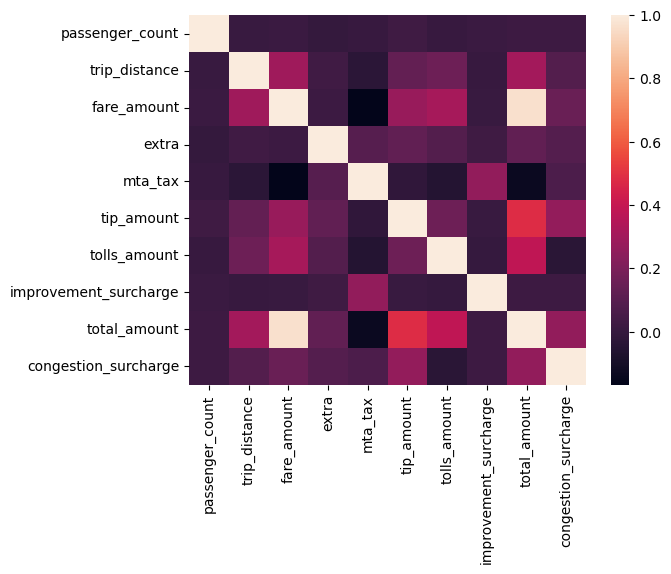

In [31]:
sns.heatmap(df.select_dtypes(include='number').corr(method='pearson'))

In [32]:
df.select_dtypes(include='number').corr(method='spearman')

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
passenger_count,1.000000,0.034699,0.028632,0.015889,-0.015450,0.023700,-0.000969,0.010646,0.033152,0.016332
trip_distance,0.034699,1.000000,0.815858,0.107288,0.083690,0.300076,0.162472,0.043510,0.795451,0.333532
fare_amount,0.028632,0.815858,1.000000,0.013993,-0.088669,0.245411,0.216550,0.024068,0.944756,0.282030
extra,0.015889,0.107288,0.013993,1.000000,0.119653,0.131187,0.034548,0.032776,0.164613,0.090009
mta_tax,-0.015450,0.083690,-0.088669,0.119653,1.000000,0.027834,-0.031747,0.260579,-0.051508,0.068870
tip_amount,0.023700,0.300076,0.245411,0.131187,0.027834,1.000000,0.065313,0.027773,0.448514,0.346544
tolls_amount,-0.000969,0.162472,0.216550,0.034548,-0.031747,0.065313,1.000000,0.000128,0.230094,-0.038259
improvement_surcharge,0.010646,0.043510,0.024068,0.032776,0.260579,0.027773,0.000128,1.000000,0.030877,0.023271
total_amount,0.033152,0.795451,0.944756,0.164613,-0.051508,0.448514,0.230094,0.030877,1.000000,0.426963
congestion_surcharge,0.016332,0.333532,0.282030,0.090009,0.068870,0.346544,-0.038259,0.023271,0.426963,1.000000


Dari correlation, nilai correlation yang paling tinggi yaitu trip_distance dan fare_amount. Jadi kita cukup mencari di sekitar total_amount, trip_distance, and fare_amount

<Axes: xlabel='trip_distance', ylabel='total_amount'>

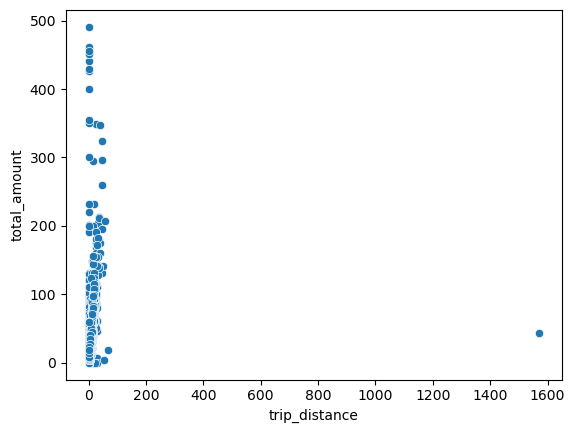

In [33]:
sns.scatterplot(data=df, x = 'trip_distance', y = 'total_amount')

Terlihat ada total amount dan trip distance yang bisa bernilai 0, hitung saja row nya.

In [34]:
df[(df['total_amount'] == 0) | ((df['total_amount'] == 0))]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1581,"VeriFone Inc,",2023-01-02 10:29:51,2023-01-02 10:30:34,Not Store and Foward trip,Standard Rate,264,264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Credit Card,Street-hail,0.0
2130,"VeriFone Inc,",2023-01-02 15:46:00,2023-01-03 15:45:15,Not Store and Foward trip,Standard Rate,193,193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Credit Card,Street-hail,0.0
2793,"Creative Mobile Technologies, LCC.",2023-01-03 03:50:19,2023-01-03 03:50:19,Store and Foward trip,Negotiated fare,129,264,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Street-hail,0.0
3557,"VeriFone Inc,",2023-01-03 12:39:11,2023-01-03 12:39:19,Not Store and Foward trip,Standard Rate,264,264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Credit Card,Street-hail,0.0
3674,"VeriFone Inc,",2023-01-03 13:28:25,2023-01-03 13:28:30,Not Store and Foward trip,Standard Rate,193,193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Credit Card,Street-hail,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59955,"VeriFone Inc,",2023-01-30 08:58:03,2023-01-30 08:58:32,Not Store and Foward trip,Standard Rate,207,207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Street-hail,0.0
60098,"VeriFone Inc,",2023-01-30 09:17:49,2023-01-30 09:19:09,Not Store and Foward trip,Standard Rate,207,207,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Street-hail,0.0
60315,"Creative Mobile Technologies, LCC.",2023-01-30 11:01:25,2023-01-30 11:04:06,Not Store and Foward trip,Negotiated fare,244,244,1.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Dispatch,0.0
61178,"VeriFone Inc,",2023-01-30 17:44:24,2023-01-30 17:45:18,Not Store and Foward trip,Standard Rate,193,193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Street-hail,0.0


Ada 69 data yang memiliki pembayaran 0, dan data yang membedakan trip_distance juga 0.

Ada data yang sangat jauh dari outlier, dan biasanya akan mengganggu corr, jadi cukup dihapus dulu

#### **Cleaning Data**

In [35]:
df.loc[df['trip_distance']>1000]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33373,"VeriFone Inc,",2023-01-17 18:40:38,2023-01-17 19:04:45,Not Store and Foward trip,Negotiated fare,82,236,1.0,1571.97,29.97,0.0,0.0,3.04,6.55,0.3,43.31,Credit Card,Street-hail,2.75


In [36]:
df = df[df['trip_distance']<1000]

In [37]:
df.select_dtypes(include='number').corr(method='spearman')

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
passenger_count,1.000000,0.034711,0.028640,0.015884,-0.015493,0.023705,-0.000928,0.010647,0.033161,0.016343
trip_distance,0.034711,1.000000,0.815852,0.107314,0.083889,0.300059,0.162351,0.043510,0.795443,0.333502
fare_amount,0.028640,0.815852,1.000000,0.014013,-0.088557,0.245394,0.216478,0.024068,0.944754,0.282005
extra,0.015884,0.107314,0.014013,1.000000,0.119609,0.131199,0.034648,0.032777,0.164638,0.090034
mta_tax,-0.015493,0.083889,-0.088557,0.119609,1.000000,0.027925,-0.031108,0.260665,-0.051374,0.069057
tip_amount,0.023705,0.300059,0.245394,0.131199,0.027925,1.000000,0.065248,0.027773,0.448501,0.346530
tolls_amount,-0.000928,0.162351,0.216478,0.034648,-0.031108,0.065248,1.000000,0.000123,0.230016,-0.038449
improvement_surcharge,0.010647,0.043510,0.024068,0.032777,0.260665,0.027773,0.000123,1.000000,0.030877,0.023270
total_amount,0.033161,0.795443,0.944754,0.164638,-0.051374,0.448501,0.230016,0.030877,1.000000,0.426942
congestion_surcharge,0.016343,0.333502,0.282005,0.090034,0.069057,0.346530,-0.038449,0.023270,0.426942,1.000000


In [38]:
df.select_dtypes(include='number').corr(method='spearman')

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
passenger_count,1.000000,0.034711,0.028640,0.015884,-0.015493,0.023705,-0.000928,0.010647,0.033161,0.016343
trip_distance,0.034711,1.000000,0.815852,0.107314,0.083889,0.300059,0.162351,0.043510,0.795443,0.333502
fare_amount,0.028640,0.815852,1.000000,0.014013,-0.088557,0.245394,0.216478,0.024068,0.944754,0.282005
extra,0.015884,0.107314,0.014013,1.000000,0.119609,0.131199,0.034648,0.032777,0.164638,0.090034
mta_tax,-0.015493,0.083889,-0.088557,0.119609,1.000000,0.027925,-0.031108,0.260665,-0.051374,0.069057
tip_amount,0.023705,0.300059,0.245394,0.131199,0.027925,1.000000,0.065248,0.027773,0.448501,0.346530
tolls_amount,-0.000928,0.162351,0.216478,0.034648,-0.031108,0.065248,1.000000,0.000123,0.230016,-0.038449
improvement_surcharge,0.010647,0.043510,0.024068,0.032777,0.260665,0.027773,0.000123,1.000000,0.030877,0.023270
total_amount,0.033161,0.795443,0.944754,0.164638,-0.051374,0.448501,0.230016,0.030877,1.000000,0.426942
congestion_surcharge,0.016343,0.333502,0.282005,0.090034,0.069057,0.346530,-0.038449,0.023270,0.426942,1.000000


Correlation tidak data yang berubah sehingga coba lihat dari kriterianya

### **Trip_distance, fare_amount, dan Total_amount**

<Axes: xlabel='fare_amount', ylabel='trip_distance'>

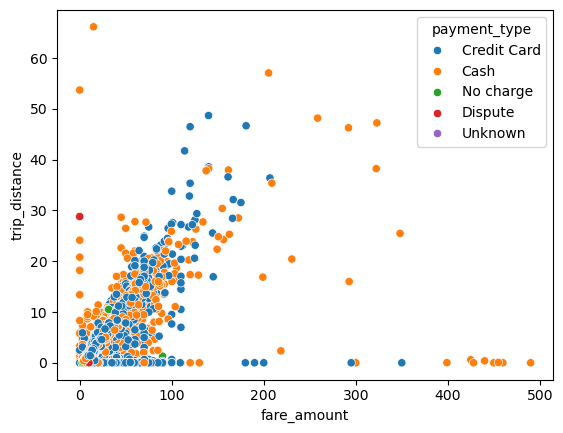

In [48]:
sns.scatterplot(data=df, x = 'fare_amount', y = 'trip_distance', hue='payment_type')

<Axes: xlabel='total_amount', ylabel='trip_distance'>

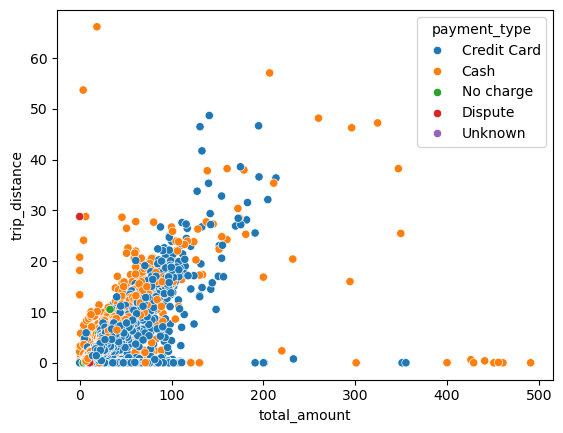

In [51]:
sns.scatterplot(data=df, x = 'total_amount', y = 'trip_distance', hue='payment_type')

<Axes: xlabel='fare_amount', ylabel='total_amount'>

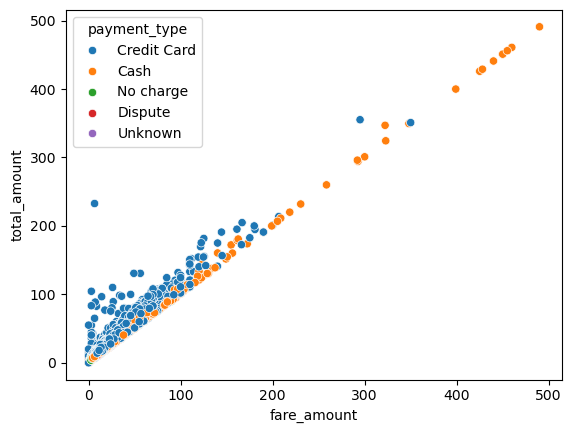

In [ ]:
sns.scatterplot(data=df, x = 'fare_amount', y = 'total_amount', hue='payment_type')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

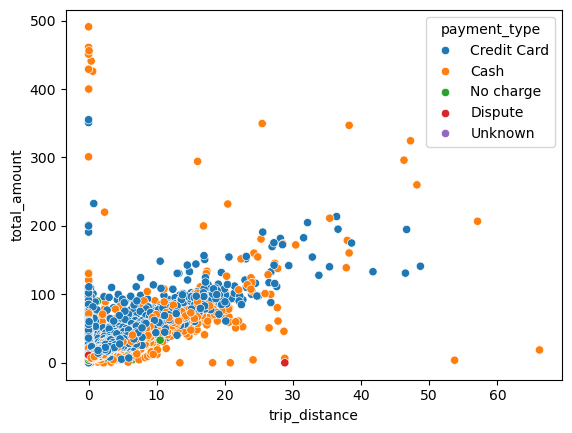

In [42]:
sns.scatterplot(data=df, x = 'trip_distance', y = 'total_amount', hue='payment_type')

Dari data yang diatas, trip distance relasi fare amount dan relasi trip distance dan total amount banyak area anomali, dimana x tinggi tapi y kecil, maupun sebaliknya. Dan terlihat data terbanyak berasal dari payment cash dan RatecodeID ke Negotiated fare

<Axes: xlabel='RatecodeID', ylabel='trip_distance'>

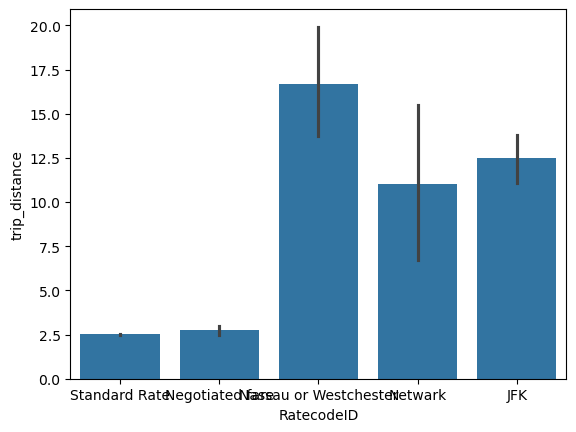

In [43]:
sns.barplot(data=df, x='RatecodeID', y = 'trip_distance')

Nilai terbanyak dari Rate code ID berdasarkan trip distance adalah Rate code ID Nassau or Westchester, dan untuk Rate code ID Group Ride tidak ditemukan atau kosong. 

### **Tip_amount**

<Axes: xlabel='RatecodeID', ylabel='tip_amount'>

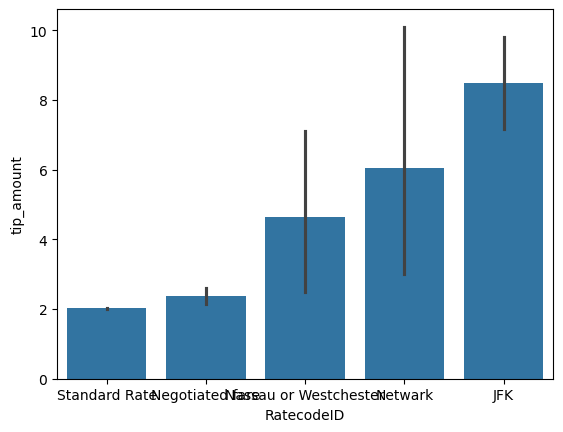

In [44]:
sns.barplot(data=df, x='RatecodeID', y = 'tip_amount')

<Axes: xlabel='trip_type', ylabel='tip_amount'>

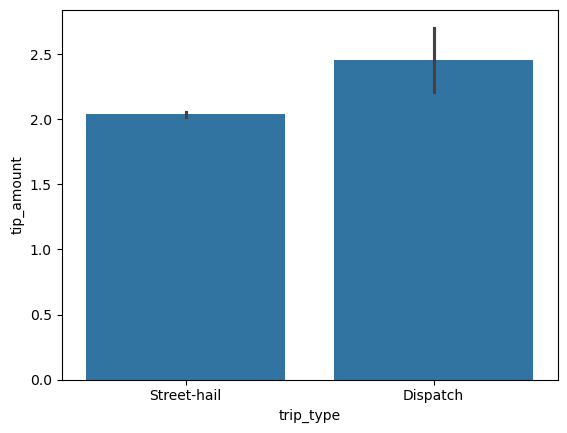

In [45]:
sns.barplot(data=df, x='trip_type', y = 'tip_amount')

Data diatas, terlihat tip yang sering diberikan adalah tip dari ratecodeID no 2 yaitu JFK dan trip type terbanyak yaitu trip type dispatch

### **Kesimpulan**

- Rate code ID berdasarkan trip distance adalah Rate code ID Nassau or Westchester, dan untuk Rate code ID Group Ride tidak ditemukan atau kosong.
- Data anomali yang dimasukkan dikarenakan anomali pembayaran $0 atau perjalanan 0 tapi lokasinya dan waktu nya sudah berjalan dan berbeda.
- Tips yang sering diberikan oleh penumpang adalah berdasarkan Rate Code ID  JFK dan trip type dispatch.
- Rate code id nomor Standard rate dan Negotiated fare perlu diperhatikan lagi karena dari total_amount dan tips yang diberikan sangat kecil daripada lainnya.
- Ada 4334 row atau 15.7% data yang memiliki nan 5 column kosong.

Data tips

- Ada 1 data anomaly setelah di standard data clean (total_amount)

Data disimpan di SQL

In [46]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///Data_Capstone_2.db')

df.to_sql('"NYC_TLC_Trip_Record', engine, if_exists = 'replace', index = False)

63702

In [47]:
#df.to_excel('NYC_TLC_Trip_Record.xlsx', index=False)